# Introducción a los Clústeres:
Los clústeres son grupos de objetos que comparten similitudes entre sí y difieren de otros grupos. La agrupación (clustering) es una técnica en el aprendizaje no supervisado que implica dividir un conjunto de datos en grupos (clústeres) basados en similitudes intra-grupo y diferencias inter-grupo.

## Clústeres Jerárquicos:
Los clústeres jerárquicos son un enfoque de agrupación que crea una estructura de árbol (dendrograma) de clústeres en la que los clústeres se subdividen en subclústeres. No es necesario especificar previamente el número de clústeres como en otros métodos. Hay dos tipos de clústeres jerárquicos:

- **Aglomerativos:** Comienzan con cada punto de datos como su propio clúster y luego combinan clústeres cercanos en etapas sucesivas.
- **Divisivos:** Comienzan con todos los datos en un solo clúster y luego se dividen en subclústeres más pequeños en cada etapa.

## Aplicaciones de los Clústeres Jerárquicos:
Los clústeres jerárquicos tienen varias aplicaciones en diferentes campos, como:

- **Biología:** Para clasificar especies en función de similitudes genéticas.
- **Marketing:** Para segmentar clientes en grupos con intereses similares.
- **Medicina:** Para analizar perfiles de pacientes y descubrir grupos de tratamientos efectivos.
- **Análisis de Imágenes:** Para segmentar regiones en imágenes basadas en similitudes.

## Ejemplo utilizando el conjunto de datos Iris y Dendrogramas:
Ahora, realizaremos un ejemplo práctico utilizando el conjunto de datos Iris y creando clústeres jerárquicos con un dendrograma.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

/home/agustin/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


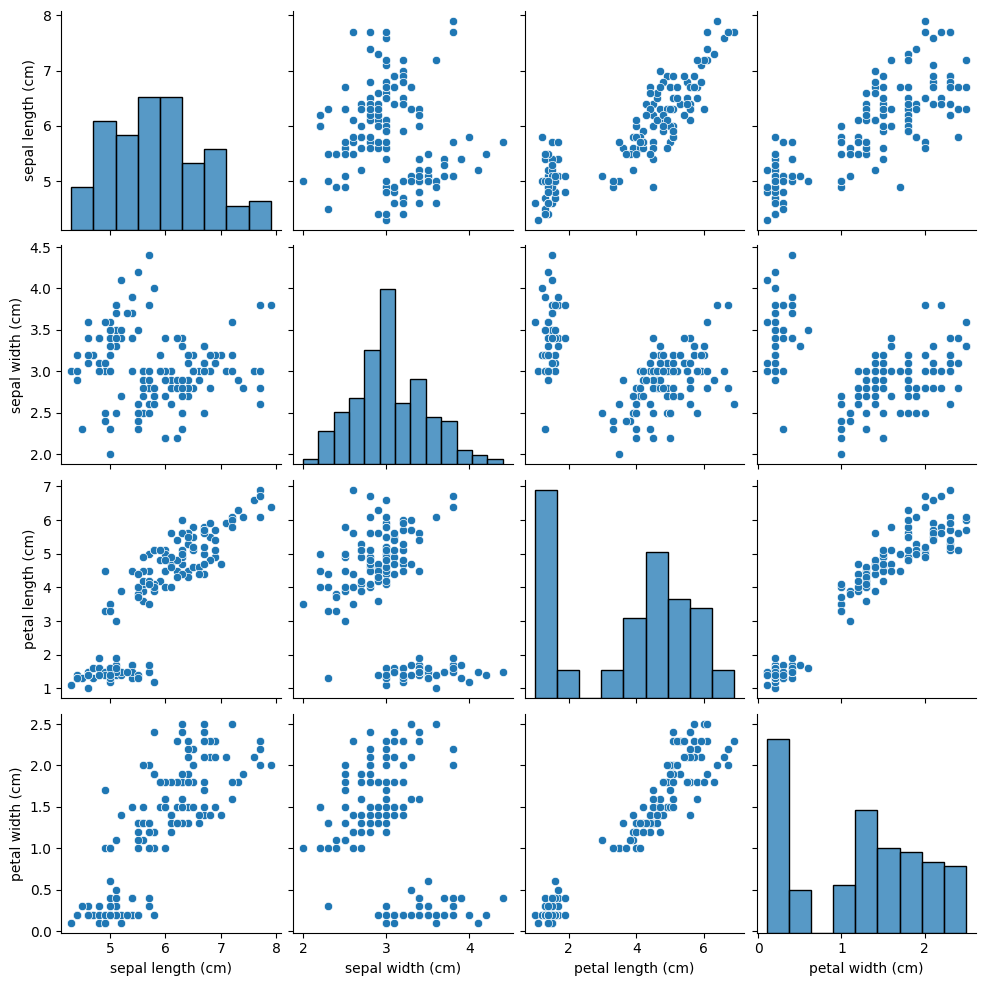

In [2]:
# Paso 1: Cargar y explorar el conjunto de datos
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
iris_df = pd.DataFrame(data=X, columns=feature_names)

# Visualizamos un par de características para obtener una vista preliminar
sns.pairplot(iris_df)
plt.title("")
plt.show()

In [3]:
# Paso 2: Crear clústeres jerárquicos

# Calculamos la matriz de enlace utilizando el método de enlace completo
Z = linkage(X, method='complete')

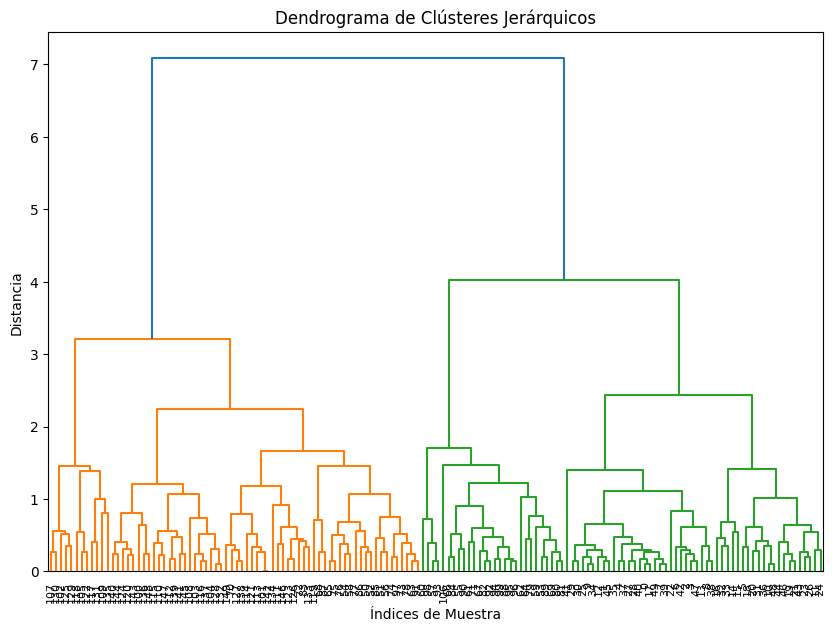

In [4]:
# Paso 3: Visualizar el dendrograma

plt.figure(figsize=(10, 7))
plt.title('Dendrograma de Clústeres Jerárquicos')
plt.xlabel('Índices de Muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [5]:
# Paso 4: Determinar el número óptimo de clústeres

# Establecemos una distancia máxima para cortar el dendrograma
max_d = 3.5

# Realizamos el corte y obtenemos los clústeres
clusters = fcluster(Z, max_d, criterion='distance')

# Agregamos la información de los clústeres al DataFrame
iris_df['cluster'] = clusters

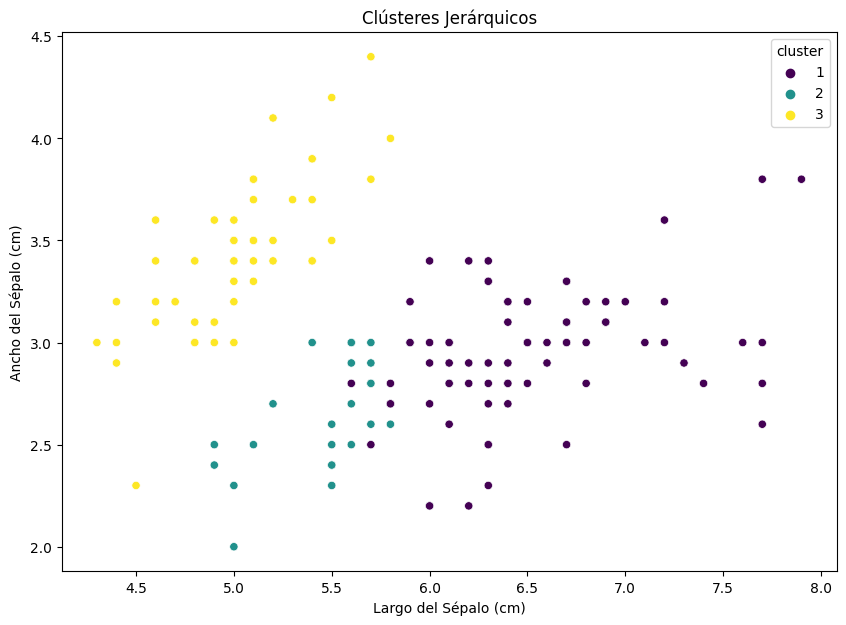

In [6]:
# Paso 5: Visualizar los clústeres

plt.figure(figsize=(10, 7))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster', data=iris_df, palette='viridis')
plt.title('Clústeres Jerárquicos')
plt.xlabel('Largo del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.show()

In [7]:
# Paso 6: Analizar estadísticas de los clústeres

for cluster_id in np.unique(clusters):
    cluster_data = iris_df[iris_df['cluster'] == cluster_id].drop('cluster', axis=1)
    cluster_mean = cluster_data.mean()
    cluster_std = cluster_data.std()

    print(f"Cluster {cluster_id} - Media:\n{cluster_mean}\nDesviación Estándar:\n{cluster_std}\n")

Cluster 1 - Media:
sepal length (cm)    6.545833
sepal width (cm)     2.963889
petal length (cm)    5.273611
petal width (cm)     1.850000
dtype: float64
Desviación Estándar:
sepal length (cm)    0.531259
sepal width (cm)     0.310068
petal length (cm)    0.634899
petal width (cm)     0.358793
dtype: float64

Cluster 2 - Media:
sepal length (cm)    5.532143
sepal width (cm)     2.635714
petal length (cm)    3.960714
petal width (cm)     1.228571
dtype: float64
Desviación Estándar:
sepal length (cm)    0.318624
sepal width (cm)     0.269725
petal length (cm)    0.390004
petal width (cm)     0.186304
dtype: float64

Cluster 3 - Media:
sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
dtype: float64
Desviación Estándar:
sepal length (cm)    0.352490
sepal width (cm)     0.379064
petal length (cm)    0.173664
petal width (cm)     0.105386
dtype: float64



In [8]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
